# A15.2 (a)

In [371]:
include("lsq_classifier_data.jl")
using LinearAlgebra
using Statistics
using Plots
using Optim

In [372]:
X_train = X
y_train = y
X_test = X_test
y_test = y_test

100-element Vector{Float64}:
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
  1.0
  1.0
  1.0
  ⋮
  1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0

In [373]:
# Calculating θ where θ = [v;β]
A = [ones(1,N); X_train]
θ = pinv(A') * y_train

# In equation f_tilde(x) = x'β + v where v = θ[1] and β[i] = θ[i+1]
v = θ[1]
β = θ[2:51]

# Calculating f_hat and f_tilde(x) for training
f_tilde_train = (X_train' * β) .+ v

# Calculating f_hat and f_tilde(x) for testing
f_tilde_test = (X_test' * β) .+ v

error_train = sum((2 .* (f_tilde_train .>= 0) - ones(size(y,1))) .!=y)/size(y,1)
print("Classification error for training data: ",error_train)

Classification error for training data: 0.2

In [374]:
error_test = sum((2 .* (f_tilde_test .>= 0) - ones(size(y_test,1))) .!=y_test)/size(y_test,1)
print("Classification error for test data: ",error_test)

Classification error for test data: 0.28

# A15.2(b)

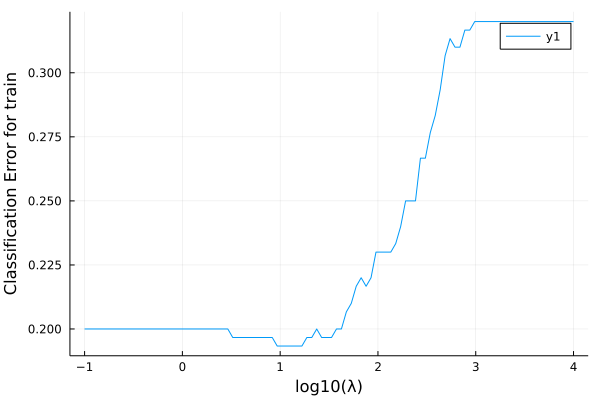

In [381]:
l_train_err=zeros(100)
l_test_err=zeros(100)
lambdas=zeros(100)
i=1
lambda=0.01

for lambda in exp10.(range(-1, stop=4, length=100))
    error_find(t)=norm(transpose(X)* t[2:end] .+ t[1] - y)^2+lambda*norm(t[2:end])^2
    ls_objective = optimize(error_find, zeros(n+1), BFGS())
    theta = Optim.minimizer(ls_objective)
    l_train_err[i]=sum((2*((transpose(X)*theta[2:end]+theta[1]*ones(size(X,2))) .>= 0)-ones(size(y,1))) .!=y)/size(y,1)
    l_test_err[i]=sum((2*((transpose(X_test)*theta[2:end]+theta[1]*ones(size(X_test,2))) .>= 0)-ones(size(y_test,1))) .!=y_test)/size(y_test,1)
    lambdas[i]=log10(lambda)

    i=i+1
end
Plots.plot(lambdas,l_train_err,xlabel="log10(λ)",ylabel="Classification Error for train")


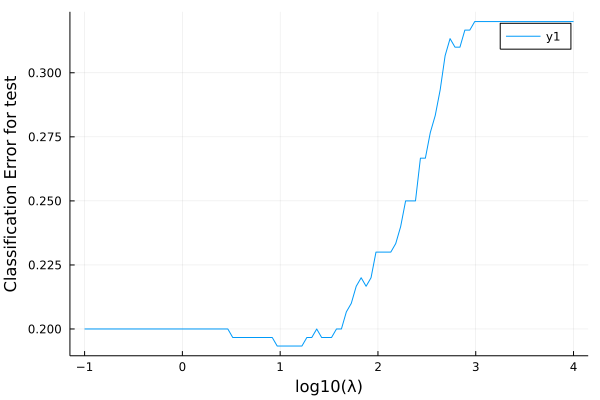

In [382]:
Plots.plot(lambdas,l_train_err,xlabel="log10(λ)",ylabel="Classification Error for test")

# A15.3

In [272]:
include("price_elasticity.jl")
using MLJ
δᵖ = zeros(n,N)
δᵈ = zeros(n,N)
for i in 1:75
    for j in 1:5
        δᵖ[j,i] = (Prices[j,i] - p_nom[j])/(p_nom[j])
        δᵈ[j,i] = (Demands[j,i] - d_nom[j])/(d_nom[j])
    end
end

In [275]:
sample , frac =randperm(N) , 0.65

([3, 52, 34, 64, 65, 73, 61, 18, 5, 56  …  40, 68, 49, 37, 19, 13, 60, 38, 51, 29], 0.65)

In [291]:
δᵖ=δᵖ[:,sample]
δᵈ=δᵈ[:,sample]
sample_length = floor(Int,frac*N) 
δᵖ_train=δᵖ[:,1:sample_length]
δᵈ_train=δᵈ[:,1:sample_length]
δᵖ_test=δᵖ[:,sample_length+1: end]
δᵈ_test=δᵈ[:,sample_length+1: end]

5×27 Matrix{Float64}:
 -0.171354    0.0444949   0.127466  …  -0.188833     0.118677   0.160915
  0.342483    0.585545   -0.271475      0.0507849    0.116107   0.655052
 -0.117767   -0.270882   -0.035342      0.157815    -0.121439  -0.322118
  0.0544534  -0.294099   -0.206119     -0.00571753  -0.503692   0.260561
  0.162419    0.107981    0.194778     -0.239767    -0.18351    0.108005

   We can write:     ||Eδᵖ - δᵈ||^2 = ||δᵖ'E' - (δᵈ)'||^2

In [292]:
for i in 1:5
    Ê[i,:] = (δᵖ_train'\δᵈ_train[i,:])'
end
Ê

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.37714    -0.174418  -1.42577    0.301033  -0.230814
  0.0940342  -0.267424  -0.41219   -0.340834  -0.835853
 -0.135804    0.021074  -0.780593  -0.445896  -0.695917
  0.32919     0.367579  -0.463901  -1.61349    0.419936
  0.835315   -1.0429    -0.648723  -0.32425   -0.874526

In [293]:
println("RMS for Train :",rms(δᵈ_train,Ê*δᵖ_train))
println("RMS for Test :",rms(δᵈ_test,Ê*δᵖ_test))

RMS for Train :0.19310040621583419
RMS for Test :0.23868946760983484


Since we know the RMS values for randomly chosen train and test data samples from the given data, we can check whether the produced model overfits by looking at how it performs on test data. If the RMS prediction error is very high on test data compared to the train data we can conclude that the model is overfitting.